In [88]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [130]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data =[[0],[0],[0],[1],[1],[1]]

In [131]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [132]:
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [133]:
H = tf.sigmoid(tf.matmul(X, W) + b)

In [234]:
cost = -tf.reduce_mean(Y*tf.log(H)+(1-Y)*(tf.log(1-H)))

In [243]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0002)

In [244]:
train = optimizer.minimize(cost)

In [245]:
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [246]:
sess = tf.Session()

In [247]:
sess.run(tf.global_variables_initializer())

In [248]:
steps = []
costs = []

for step in range(50001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0:
        print (step, "Cost: {:.2f}".format(cost_val))
        costs.append(cost_val)
        steps.append(step)

# Accuracy report
hypo_val, predict_val, acc_val = sess.run([H, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
print("\nHypothesis : ", hypo_val, "\nCorrect(Y) : ", predict_val, "\nAccuracy : ", acc_val)

0 Cost: 0.75
1000 Cost: 0.60
2000 Cost: 0.53
3000 Cost: 0.50
4000 Cost: 0.48
5000 Cost: 0.48
6000 Cost: 0.48
7000 Cost: 0.47
8000 Cost: 0.47
9000 Cost: 0.47
10000 Cost: 0.47
11000 Cost: 0.47
12000 Cost: 0.47
13000 Cost: 0.46
14000 Cost: 0.46
15000 Cost: 0.46
16000 Cost: 0.46
17000 Cost: 0.46
18000 Cost: 0.46
19000 Cost: 0.45
20000 Cost: 0.45
21000 Cost: 0.45
22000 Cost: 0.45
23000 Cost: 0.45
24000 Cost: 0.45
25000 Cost: 0.44
26000 Cost: 0.44
27000 Cost: 0.44
28000 Cost: 0.44
29000 Cost: 0.44
30000 Cost: 0.44
31000 Cost: 0.44
32000 Cost: 0.43
33000 Cost: 0.43
34000 Cost: 0.43
35000 Cost: 0.43
36000 Cost: 0.43
37000 Cost: 0.43
38000 Cost: 0.42
39000 Cost: 0.42
40000 Cost: 0.42
41000 Cost: 0.42
42000 Cost: 0.42
43000 Cost: 0.42
44000 Cost: 0.42
45000 Cost: 0.41
46000 Cost: 0.41
47000 Cost: 0.41
48000 Cost: 0.41
49000 Cost: 0.41
50000 Cost: 0.41

Hypothesis :  [[0.18048474]
 [0.21830937]
 [0.7133611 ]
 [0.6223078 ]
 [0.80008173]
 [0.9490292 ]] 
Correct(Y) :  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 

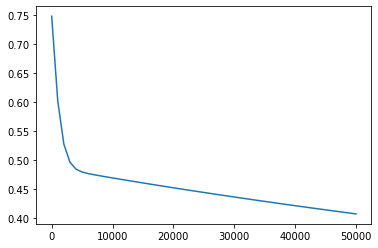

In [249]:
plt.plot(steps, costs)